In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as kb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

In [2]:
races = pd.read_csv('f1races.csv')
races.head()

,Unnamed: 0,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,...,Position,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,Event
0,1,2118.765,GAS,10,72.412,2.0,1.0,17.960,32.228,22.224,...,12.0,27.7,35.5,939.0,False,54.1,276,0.7,2020,Austrian Grand Prix
1,2,2190.076,GAS,10,71.311,3.0,1.0,17.513,31.717,22.081,...,12.0,28.1,35.6,939.0,False,54.0,156,1.7,2020,Austrian Grand Prix
2,3,2260.801,GAS,10,70.725,4.0,1.0,17.410,31.510,21.805,...,12.0,28.6,33.7,939.0,False,54.1,90,2.0,2020,Austrian Grand Prix
3,4,2332.312,GAS,10,71.511,5.0,1.0,17.464,31.827,22.220,...,12.0,28.9,32.8,938.9,False,54.7,87,3.1,2020,Austrian Grand Prix
4,5,2404.340,GAS,10,72.028,6.0,1.0,17.944,31.741,22.343,...,12.0,28.3,34.0,938.9,False,53.6,72,2.9,2020,Austrian Grand Prix


In [3]:
races.head(-5)

,Unnamed: 0,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,...,Position,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,Event
0,1,2118.765,GAS,10,72.412,2.0,1.0,17.960,32.228,22.224,...,12.0,27.7,35.5,939.0,False,54.1,276,0.7,2020,Austrian Grand Prix
1,2,2190.076,GAS,10,71.311,3.0,1.0,17.513,31.717,22.081,...,12.0,28.1,35.6,939.0,False,54.0,156,1.7,2020,Austrian Grand Prix
2,3,2260.801,GAS,10,70.725,4.0,1.0,17.410,31.510,21.805,...,12.0,28.6,33.7,939.0,False,54.1,90,2.0,2020,Austrian Grand Prix
3,4,2332.312,GAS,10,71.511,5.0,1.0,17.464,31.827,22.220,...,12.0,28.9,32.8,938.9,False,54.7,87,3.1,2020,Austrian Grand Prix
4,5,2404.340,GAS,10,72.028,6.0,1.0,17.944,31.741,22.343,...,12.0,28.3,34.0,938.9,False,53.6,72,2.9,2020,Austrian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72587,909,5556.135,PIA,81,84.750,24.0,1.0,31.398,28.788,24.564,...,3.0,18.8,55.0,1015.6,False,22.6,0,0.5,2024,Qatar Grand Prix
72588,910,5641.032,PIA,81,84.897,25.0,1.0,31.783,28.772,24.342,...,3.0,18.8,55.0,1015.6,False,22.6,15,1.0,2024,Qatar Grand Prix
72589,911,5725.930,PIA,81,84.898,26.0,1.0,31.744,28.781,24.373,...,3.0,18.8,55.0,1015.6,False,22.5,3,1.2,2024,Qatar Grand Prix
72590,917,6235.034,PIA,81,84.894,32.0,1.0,31.769,28.717,24.408,...,3.0,18.6,56.0,1015.6,False,22.3,36,1.4,2024,Qatar Grand Prix


In [4]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72597 entries, 0 to 72596
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72597 non-null  int64  
 1   Time            72597 non-null  float64
 2   Driver          72597 non-null  object 
 3   DriverNumber    72597 non-null  int64  
 4   LapTime         72597 non-null  float64
 5   LapNumber       72597 non-null  float64
 6   Stint           72597 non-null  float64
 7   Sector1Time     72597 non-null  float64
 8   Sector2Time     72597 non-null  float64
 9   Sector3Time     72597 non-null  float64
 10  SpeedI1         72597 non-null  float64
 11  SpeedI2         72597 non-null  float64
 12  SpeedFL         72597 non-null  float64
 13  SpeedST         72597 non-null  float64
 14  IsPersonalBest  72597 non-null  bool   
 15  Compound        72597 non-null  object 
 16  TyreLife        72597 non-null  float64
 17  FreshTyre       72597 non-null 

In [5]:
races.describe()

,Unnamed: 0,Time,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,...,TyreLife,TrackStatus,Position,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Year
count,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,...,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000,72597.000000
mean,573.617477,6353.327652,28.030194,88.208675,31.429866,2.125460,27.512291,34.257589,26.438795,256.978856,...,15.448779,1.432759,9.741959,23.526523,53.916309,983.637747,35.676816,160.213659,1.580379,2022.146494
std,345.992704,2170.043180,24.556092,11.953316,18.472303,0.996048,5.903177,6.655312,5.594954,46.548616,...,10.429729,2.298886,5.348604,4.998734,16.725564,52.124477,9.395345,96.645919,1.168629,1.383246
min,1.000000,193.470000,1.000000,55.404000,2.000000,1.000000,16.632000,17.488000,16.396000,40.000000,...,1.000000,1.000000,1.000000,8.900000,5.000000,778.500000,13.800000,0.000000,0.000000,2020.000000
25%,280.000000,4740.701000,10.000000,79.568000,16.000000,1.000000,23.724000,30.029000,22.148000,220.000000,...,7.000000,1.000000,5.000000,20.400000,41.000000,978.100000,29.100000,89.000000,0.700000,2021.000000
50%,559.000000,6260.568000,20.000000,85.984000,31.000000,2.000000,28.216000,32.520000,25.730000,272.000000,...,13.000000,1.000000,10.000000,22.800000,56.000000,1003.200000,36.300000,154.000000,1.300000,2022.000000
75%,839.000000,7802.501000,44.000000,97.372000,46.000000,3.000000,30.757000,38.894000,29.397000,290.000000,...,21.000000,1.000000,14.000000,27.300000,64.800000,1012.900000,42.900000,226.000000,2.100000,2023.000000
max,1530.000000,15109.573000,99.000000,149.461000,87.000000,8.000000,92.283000,81.925000,77.723000,359.000000,...,78.000000,21.000000,20.000000,37.200000,94.800000,1023.300000,57.500000,359.000000,8.600000,2024.000000


In [6]:
races['race_driver_id'] = races['Driver'] + "_" + races['Event']
races.groupby('race_driver_id')

In [7]:
features = ['LapTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'TyreLife', 'TrackTemp', 'AirTemp', 'Humidity', 'Rainfall', 'WindSpeed']

# Normalize continuous features
scaler = StandardScaler()
races[features] = scaler.fit_transform(races[features])

# Encode categorical data
races['Compound'] = races['Compound'].astype('category').cat.codes #onehotencoder doesn't work here?

# Prepare sequences for LSTM
sequence_length = 10  # Number of laps
X, y_lap, y_tire = [], [], []

for i in range(sequence_length, len(races)):
    X.append(races[features].iloc[i-sequence_length:i].values)
    y_lap.append(races['LapNumber'].iloc[i])  # Lap for pit stop 
    y_tire.append(races['Compound'].iloc[i])  # Tire compound 

X = np.array(X)
y_lap = np.array(y_lap)
y_tire = np.array(y_tire)

from sklearn.model_selection import train_test_split
X_train, X_test, y_lap_train, y_lap_test, y_tire_train, y_tire_test = train_test_split(X, y_lap, y_tire, test_size=0.2, random_state=42)

In [8]:
model_lap = Sequential()
model_lap.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_lap.add(LSTM(32, activation='relu'))
model_lap.add(Dense(1))  # Output: predicted lap number for pit stop

model_lap.compile(optimizer='adam', loss='mean_squared_error')

history_pitlap = model_lap.fit(X_train, y_lap_train, epochs=10, batch_size=32, validation_data=(X_test, y_lap_test))

C:\Users\abhir\py312-venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 382.2768 - val_loss: 207.1760
Epoch 2/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 199.7154 - val_loss: 180.6840
Epoch 3/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 160.6994 - val_loss: 149.4693
Epoch 4/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 143.7218 - val_loss: 137.7142
Epoch 5/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 129.6263 - val_loss: 121.4138
Epoch 6/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 119.5951 - val_loss: 118.2399
Epoch 7/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 115.4433 - val_loss: 109.5117
Epoch 8/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 107.2830 - val_loss: 111.8714
Epoch 9/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 103.4365 - val_loss: 102.2308
Epoch 10/10
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 98.3996 - val_loss: 108.4141


In [9]:
model_tire = Sequential()
model_tire.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_tire.add(LSTM(32, activation='relu'))
model_tire.add(Dense(5, activation='softmax'))  # Output: 5 possible tire compounds

model_tire.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_tire = model_tire.fit(X_train, y_tire_train, epochs=10, batch_size=64, validation_data=(X_test, y_tire_test))

Epoch 1/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5265 - loss: 0.9888 - val_accuracy: 0.6076 - val_loss: 0.7962
Epoch 2/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6193 - loss: 0.7845 - val_accuracy: 0.6314 - val_loss: 0.7497
Epoch 3/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6395 - loss: 0.7411 - val_accuracy: 0.6490 - val_loss: 0.7299
Epoch 4/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6578 - loss: 0.7123 - val_accuracy: 0.6622 - val_loss: 0.7062
Epoch 5/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6663 - loss: 0.7015 - val_accuracy: 0.6752 - val_loss: 0.6912
Epoch 6/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6790 - loss: 0.6783 - val_accuracy: 0.6920 - val_loss: 0.6667
Epoch 7/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6846 - loss: 0.6637 - val_accuracy: 0.6845 - val_loss: 0.6631
Epoch 8/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6986 - loss: 0.6459 - val_accuracy

In [16]:
lap_loss = model_lap.evaluate(X_test, y_lap_test)

tire_loss, tire_accuracy = model_tire.evaluate(X_test, y_tire_test)

lap_prediction = model_lap.predict(X_test) 
tire_prediction = model_tire.predict(X_test)  

# Convert tire prediction to actual label
predicted_tire = np.argmax(tire_prediction, axis=1)

454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 107.3411
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7047 - loss: 0.6323
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


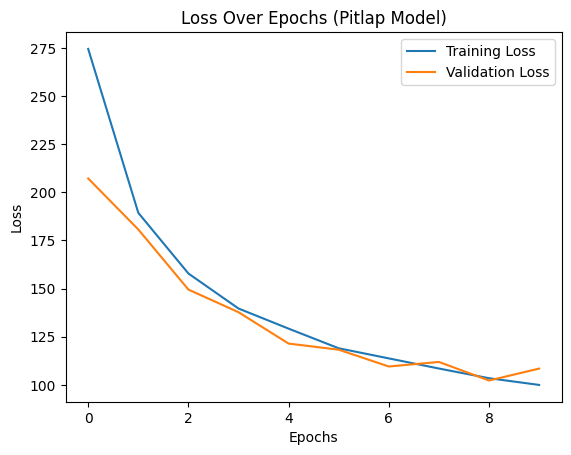

In [21]:
plt.plot(history_pitlap.history['loss'], label='Training Loss')
plt.plot(history_pitlap.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Pitlap Model)')
plt.legend()
plt.show()

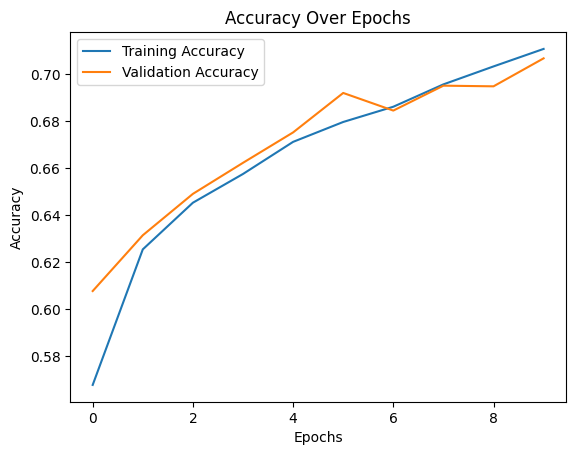

In [22]:
plt.plot(history_tire.history['accuracy'], label='Training Accuracy')
plt.plot(history_tire.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

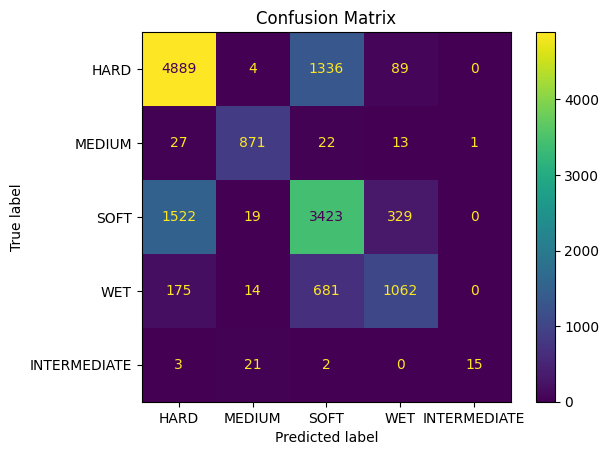

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_compound_classes = tire_prediction.argmax(axis=1)

conf_matrix = confusion_matrix(y_tire_test, y_pred_compound_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['HARD', 'MEDIUM', 'SOFT', 'WET','INTERMEDIATE'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()